# K-Means Clustering

The k-means algorithm assumes that there are k clusters (k must be given) in given data points and gives the best cluster groups and their centres by iterative process. First we assume k random points as cluster positions and each of the data points are assigned to those clusters that are the nearest to them. Now the cluster position of each cluster is changed to the mean position of the points in that cluster and now with these cluster position cluster groups are re-assigned in the same way. This process is continued till convergence.

In other words,we will be plotting the given points with,say n features in an n-dimensional space(in this case a 3-dimensional space). There are k groups/clusters of points and the distinctive feature between these groups/clusters in our case is the 'target' variable. The k-means algorithm gives us the centers of each of these clusters. We can determine in which cluster a given point lies by finding which center(of the clusters) is closest to this point and hence we can determine the value of 'target' variable.

In this algorithm,the hyperparameters can be the number of clusters,i.e,k and the initial cluster positions. Initialization of the clusters can either be random or may also use some methods,like k-means++. We shall initialise them randomly.

The value of the 'target' variable can be 0,1 or 2. So it makes sense that number of clusters is 3. We shall prove this using elbow method,a well known process to determine the best value of k. .In this method,we find within-cluster sum of squares (WCSS),which the sum of squares of the distances between each point and the cluster center of the cluster to which the point is assigned,for multiple values of k and plot a graph of WCSS vs k. From the graph we find the elbow point,which is the point where the slope changes abruptly and the k value of this point is declared as the optimal value of k.

Let us now start writing the code.

### The Code

First,let us import the necessary libraries and data sets

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

df_train=pd.read_csv(r"D:\data1_train.csv")
df_test=pd.read_csv(r"D:\data1_test.csv")


As per the k-means algorithm we first need a initial cluster which we will now initialise randomly.

In [2]:
def initialclusterf(df_train,k):
    initialcluster=[]
    for i in range(k):
        s=random.randint(0,len(df_train)-1)
        initialcluster.append(df_train.iloc[s])
    return np.array(initialcluster)

Now,we shall write a function that will find the mean position of the new clusters when an intial cluster is given.It shall return the new cluster centers as well as the corresponding WCSS value.

In [3]:
def kmeans(df_train,initialcluster,k):
    wcss=0
    array_m=np.zeros((k,5))
    finalcluster=np.zeros((k,4))
    for i in range(len(df_train)):
      d=np.inf
      y=0
      for j in range(k):
        x=np.linalg.norm(df_train.iloc[i,:3]-initialcluster[j,:3])
        if x<d:
           d=x
           y=j
      array_m[y]=array_m[y]+np.array((df_train.iloc[i,0],df_train.iloc[i,1],df_train.iloc[i,2],df_train.iloc[i,3],1))
      wcss=wcss+d*d
    for t in range(k):
      if array_m[(t, 4)]!=0:
        finalcluster[(t, 0)] = array_m[(t, 0)] / array_m[(t, 4)]
        finalcluster[(t, 1)] = array_m[(t, 1)] / array_m[(t, 4)]
        finalcluster[(t, 2)] = array_m[(t, 2)] / array_m[(t, 4)]
        finalcluster[(t, 3)] = array_m[(t, 3)] / array_m[(t, 4)]
      if array_m[(t, 4)]==0:
        finalcluster[(t, 0)] = 0
        finalcluster[(t, 1)] = 0
        finalcluster[(t, 2)] = 0
        finalcluster[(t, 3)] = 0
    return [finalcluster,wcss]

Here,the outer for loop is iterating over each data point and the inner loop is iterating over each cluster position to find the nearest cluster position to the given point (given by the outer loop). The array named array_m is a k by 5 array. This serves a purpose. It has k rows so as store information regarding k cluster points. Also it has 5 columns. The first 3 columns hold the sum of the corresponding coordinates of the points that are assigned to that cluster,the 4th column holds the sum of the target variable of the same points and the last column holds the number of points that are assigned to that cluster. So when first 4 column values are divided by 5th column values,we get the mean of the points in that cluster. This is how we are updating the finalcluster array. At the end of an inner loop,y is assigned with the index of the cluster position in initialcluster array that is closest to the point,d is assigned with the distance between these two,array_m and WCSS are updated. At the end of the outer loop,we shall update finalcluster array. The function returns the finalcluster array as well as WCSS value for that particular initialisation.

This function is just one iteration of many iterations at the end of which we obtain the best cluster centers. To perform this,we shall write another function that recursively calls the above function. 

In [4]:
def mainalgo(df_train,initialcluster,k):
    finalcluster=kmeans(df_train,initialcluster,k)
    if np.array_equal(finalcluster[0],initialcluster):
       return finalcluster
    else:
       return mainalgo(df_train,finalcluster[0],k)

It must be noted that kmeans() function returns an object that contains the new cluster centers as well as WCSS which is why we are using index on finalcluster variable as finalcluster[0]. finalcluster[1] gives the WCSS value.

These functions together give us the finalcluster centers for a given value of k. Now,to prove that k=3 is the best solution,we shall apply the elbow method with the following function.

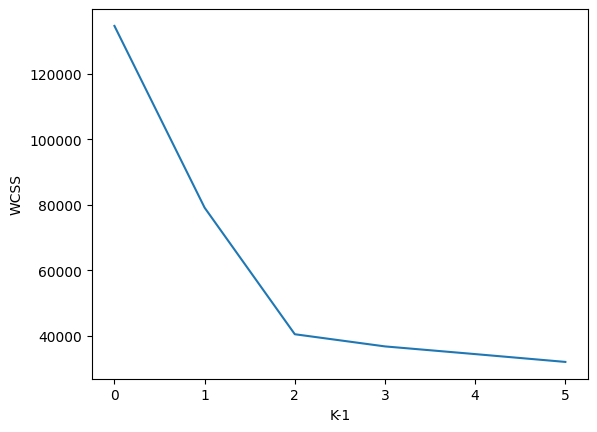

In [5]:
def elbow_k(df_train):
    wcss_lists=[]
    for k_1 in range(6):
       k=k_1+1
       finalcluster=mainalgo(df_train,initialclusterf(df_train,k),k)
       wcss_lists.append(finalcluster[1])
    plt.plot(wcss_lists)
    plt.xlabel('K-1')
    plt.ylabel('WCSS')
    plt.show()
    
elbow_k(df_train)

There is an abrupt change in the slope at k-1=2,i.e at k=3. hence,we have proved that k=3.Now,let us train the model for k=3 and test it.

In [6]:
initialcluster=initialclusterf(df_train,3)
result=mainalgo(df_train,initialcluster,3)
finalcluster=result[0]
finalcluster

array([[9.82548004e+01, 8.33283770e+01, 9.45283040e+01, 3.40909091e-02],
       [9.92542674e+01, 7.54276218e+01, 7.70426637e+01, 1.95357143e+00],
       [8.34444662e+01, 7.64763129e+01, 8.87446822e+01, 9.92187500e-01]])

The target values of the center points are neither 0,1 nor 2,but are very close to them. This happens because some points were assigned to the cluster whose target value doesn't match with its own. This also causes some inaccuracy. Before the testing,let us first change the target values to the required ones for easier testing.

In [7]:
import math
for i in range(3):
    finalcluster[i,3]=round(finalcluster[i,3])
finalcluster

array([[98.25480036, 83.32837705, 94.52830396,  0.        ],
       [99.25426741, 75.42762178, 77.0426637 ,  2.        ],
       [83.44446624, 76.47631289, 88.74468222,  1.        ]])

Now let us test the accuracy of this model.

In [8]:
count=0
for i in range(len(df_train)):
    d=np.inf
    for j in range(3):
        x=np.linalg.norm(finalcluster[j,:3]-df_train.iloc[i,:3])
        if x<d:
          d=x
          k=finalcluster[j,3]
    if k==df_train.iloc[i,3]:
        count+=1
accuracy=(count/len(df_train))*100
print(f"Accuracy on train: {accuracy}%")

Accuracy on train: 97.5%


In [9]:
count=0
for i in range(len(df_test)):
    d=np.inf
    for j in range(3):
        x=np.linalg.norm(finalcluster[j,:3]-df_test.iloc[i,:3])
        if x<d:
          d=x
          k=finalcluster[j,3]
    if k==df_test.iloc[i,3]:
        count+=1
accuracy=(count/len(df_test))*100
print(f"Accuracy on test: {accuracy}%")

Accuracy on test: 97.5%


As we can see here,the accuracy of this model is more than 97% on both test and train data sets. Let us now compare it with a model trained using scikit-learn.

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

x_train=df_train[['Feature_1','Feature_2','Feature_3']].values
y_train=df_train['Target'].values

x_test=df_test[['Feature_1','Feature_2','Feature_3']].values
y_test=df_test['Target'].values

model=KMeans(n_clusters=3,random_state=42)
model.fit(x_train)
train_labels=model.predict(x_train)
test_labels=model.predict(x_test)
n_clusters=3
def map_clusters_to_labels(cluster_labels, true_labels):
    labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        mask = (cluster_labels == i)
        if np.any(mask):  # Check if there are any true labels in this cluster
            labels[mask] = mode(true_labels[mask])[0]
    return labels


mapped_train_labels = map_clusters_to_labels(train_labels, y_train)
mapped_test_labels = map_clusters_to_labels(test_labels, y_test)

train_accuracy=accuracy_score(y_train,mapped_train_labels)*100
print(f'Accuracy on training data: {train_accuracy}%')

test_accuracy=accuracy_score(y_test,mapped_test_labels)*100
print(f'Accuracy on testing data: {test_accuracy}%')

Accuracy on training data: 97.375%
Accuracy on testing data: 97.5%
